In [39]:
#Original from Christopher McCabe 8 Dec 2015, converted to python and updated by Bjoern Penning
#Read in from the mDM - mMed plane and translate to the direct detection plane
#for the vector mediator
#assumes the Lagrangian is the same as eq 2.1 of arXiv:1407.8257, see eq. 3.8 for calc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
from array import array
import sys
import math
from scipy.interpolate import spline


In [40]:

#bunch of defintions
gDM = 1
gSM = 0.25
gu=gd=gs = 1.0
mn=0.938
conv_units=2.568*pow(10.,27.) #not sure if this is still ok
Delta_d_p, Delta_u_p, Delta_s_p = -0.42, 0.85, -0.08


In [41]:
mmed_d=[]
mdm_d=[]
#for line in open("data/LUX1.dat"):
for line in open("data/LUX_2016_SI.dat"):
    elems = line.split()
    mDM = float(elems[0])
    mu_nDM=mn*mDM/(mn+mDM)
   
    #Chris' calc
    sigma = float(elems[1])*conv_units
    mMed=pow((2*gu+gd)*gDM*mu_nDM,0.5)/pow(math.pi*sigma,0.25);
    
    #my calc
    #sigma = float(elems[1])*conv_units
    #f=(3*gDM*gSM*mu_nDM)
    #fsq=pow(f,2)
    #SmMed=pow(fsq/(math.pi*sigma),0.25)
    
    mmed_d.append(float(mMed))
    mdm_d.append(float(mDM))



In [42]:
mmed_c=[]
mdm_c=[]
for line in open("data/CMS_monojet_July2017_vector.dat"):
    elems = line.split()
    mMed = float(elems[0])
    mDM = float(elems[1])
    mmed_c.append(float(mMed))
    mdm_c.append(float(mDM))

#f = interp1d(mmed, mdm, kind='pol')


In [43]:
#print str(mdm_r)+" "+str(mmed_r)
#print mmed_r

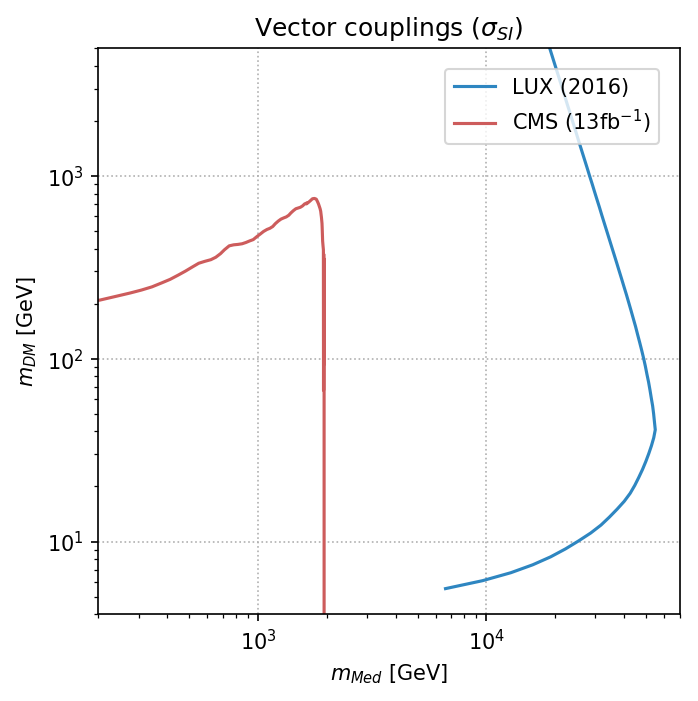

In [44]:
#mmed_ds = np.linspace(min(mmed_d), max(mmed_d), 1000)
#mdm_ds = np.linspace(min(mdm_d), max(mdm_d), 200)
#mdm_ds= spline(mmed_d, mdm_d, mdm_ds)


fig = plt.figure(figsize=(5, 5), dpi=150)
plt.title("Vector couplings ($\sigma_{SI}$)")
plt.plot(mmed_d, mdm_d, 'k-', color='#2E86C1', label="LUX (2016)")
plt.plot(mmed_c, mdm_c, 'k-', color='#CD5C5C', label="CMS (13fb$^{-1}$)")
plt.ylabel("$m_{DM}$ [GeV]")
plt.xlabel("$m_{Med}$ [GeV]")
plt.grid(linestyle='dotted')
plt.yscale("log")
plt.xscale("log")
#plt.xlim(200,1.5E5)
#plt.ylim(4,2E4)
plt.xlim(200,70000)
plt.ylim(4,5000)

plt.legend(loc=1, ncol=1, borderaxespad=01.)
#plt.savefig("Axial_LUX_update_log.pdf")
plt.show()